# Dashboard de Vendas

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [27]:
# Conexão com PostgreSQL (use o nome do container como host)
usuario = 'usuario'
senha = '123456'
host = 'localhost'  # ou IP do servidor
porta = '5432'
banco = 'dashboard'

engine = create_engine(f'postgresql+psycopg2://{usuario}:{senha}@{host}:{porta}/{banco}')

In [37]:
# Leitura de volta das tabelas
df_lojas = pd.read_sql('SELECT * FROM lojas', engine)
df_produtos = pd.read_sql('SELECT * FROM produtos', engine)
df_clima = pd.read_sql('SELECT * FROM clima', engine)
df_chocolate = pd.read_sql('SELECT * FROM chocolate', engine)
df_vendas = pd.read_sql('SELECT * FROM vendas', engine)

print(df_lojas.head())
print(df_produtos.head())
print(df_clima.head())
print(df_chocolate.head())
print(df_vendas.head())

                                 ID Loja,Loja,Cidade
0       L90011,BrownSweet,"Porto Alegre, RS, Brasil"
1  L90012,CacaoParadise,"Belo Horizonte, MG, Brasil"
2        L90013,ChocoDelight,"São Paulo, SP, Brasil"
3       L90014,GoldCacao,"Florianópolis, SC, Brasil"
4            L90015,RichChoco,"Curitiba, PR, Brasil"
                   Produto,Categoria, Valor Unitario
0  BA0001-Barra ao Leite Suprema,Barras de Chocol...
1  BA0002-Barra com Frutas Vermelhas,Barras de Ch...
2  BA0003-Barra Dark Fantasia,Barras de Chocolate...
3  BA0004-Barra de Caramelo Salgado,Barras de Cho...
4  BO0001-Bombom de Caramelo Salgado,Bombons, R$ ...
  Estado      Cidade Clima Predominante
0     AC  Rio Branco         Equatorial
1     AL      Maceio           Tropical
2     AM      Manaus         Equatorial
3     AP      Macapa         Equatorial
4     BA    Salvador           Tropical
  Codigo           Tipo de Chocolate                 Tendencia Atual  \
0  CH001        Chocolate Amargo 70%  Alta demanda (

# Total de Vendas por Loja

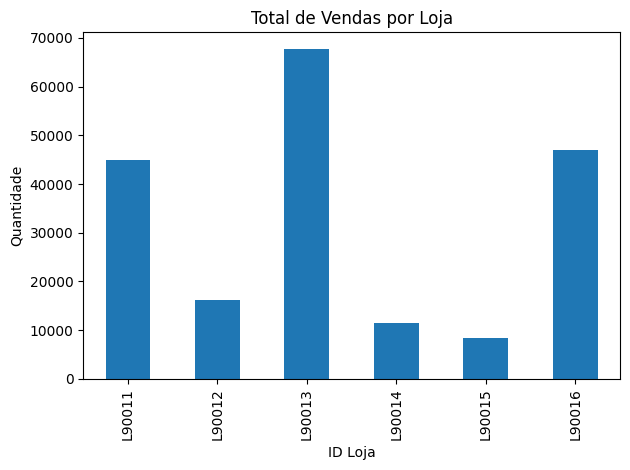

In [33]:
# Agrupamento e visualização
vendas_por_loja = df_vendas.groupby('ID Loja')['Quantidade'].sum()

vendas_por_loja.plot(kind='bar', title='Total de Vendas por Loja', ylabel='Quantidade')
plt.tight_layout()
plt.show()

# Tipos de chocolate × Custo estimado por kg

In [39]:
print(df_chocolate.columns)


Index(['Codigo', 'Tipo de Chocolate', 'Tendencia Atual',
       'Custo Estimado (R$/kg)'],
      dtype='object')


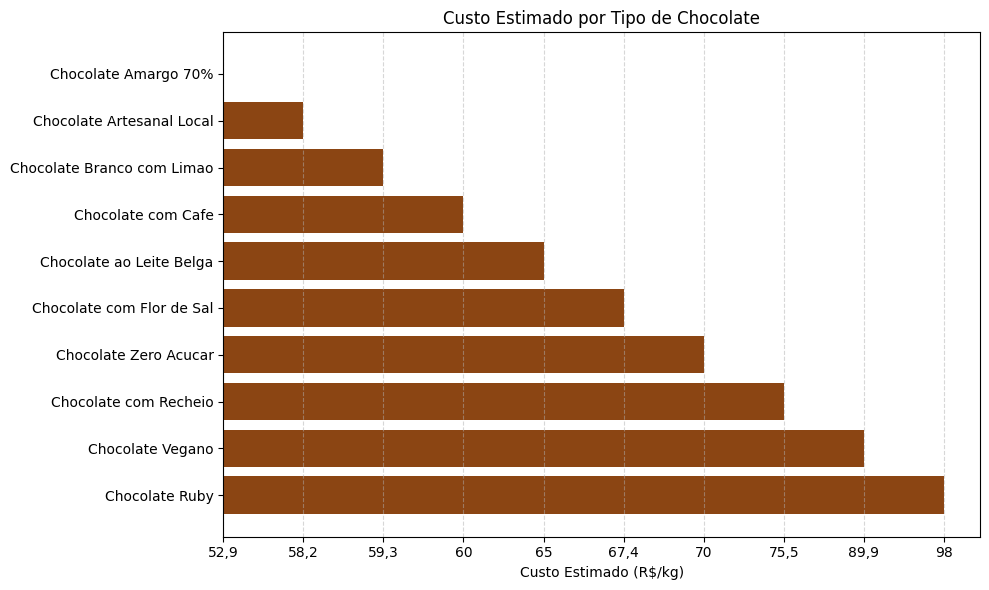

In [40]:
df_chocolate = pd.DataFrame(df_chocolate)

# Ordenar por custo crescente
df_chocolate = df_chocolate.sort_values(by='Custo Estimado (R$/kg)', ascending=True)

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(df_chocolate['Tipo de Chocolate'], df_chocolate['Custo Estimado (R$/kg)'], color='saddlebrown')
plt.xlabel('Custo Estimado (R$/kg)')
plt.title('Custo Estimado por Tipo de Chocolate')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.gca().invert_yaxis()  # Mais caro no topo
plt.show()

# Gráfico de bolhas ou wordcloud: Tendências atuais, visualizando os temas mais frequentes nas descrições (ex: “fitness”, “gourmet”, “sofisticado”).